In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from math import e, pi, sin, cos
%matplotlib inline
from filter_optimizer.filterplot import plot_response, plot_delay, pole_zero_plot

In [2]:
def update_conjugate_complex (numbers) :
    """ Modify numbers in-place to add conjugate complex numbers"""
    n2 = [k.conjugate () for k in numbers if k.imag]
    numbers.extend (n2)

[1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00 3.16227766e+00 1.00000000e+01 3.16227766e+01
 1.00000000e+02]
[-4.+3.j -4.-3.j] [0.]
[5. 5.] [0.]


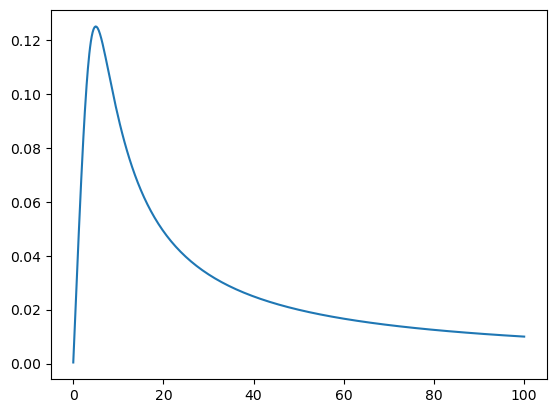

In [3]:
print (signal.findfreqs([1, 0], [1, 8, 25], N=9))
tf = signal.TransferFunction ([1, 0], [1, 8, 25])
print (tf.poles, tf.zeros)
print (abs (tf.poles), abs (tf.zeros))
w, h = signal.freqs_zpk (tf.zeros, tf.poles, 1.0)
plt.plot (w, abs (h))

[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02]


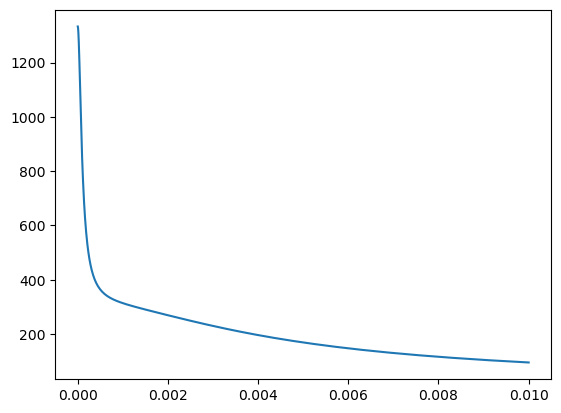

In [4]:
z = [318e-6]
p = [3180e-6, 75e-6]
print (signal.findfreqs (z, p, 5, kind = 'zp'))
w, h = signal.freqs_zpk (z, p, 1.0)
plt.plot (w, abs (h))

In [5]:
tf = signal.TransferFunction([1/3,1/3,1/3], [1])
print (tf.zeros)

[-0.5+0.8660254j -0.5-0.8660254j]


In [6]:
signal.tf2zpk([1/3,1/3,1/3], [1])

(array([-0.5+0.8660254j, -0.5-0.8660254j]),
 array([], dtype=float64),
 0.3333333333333333)

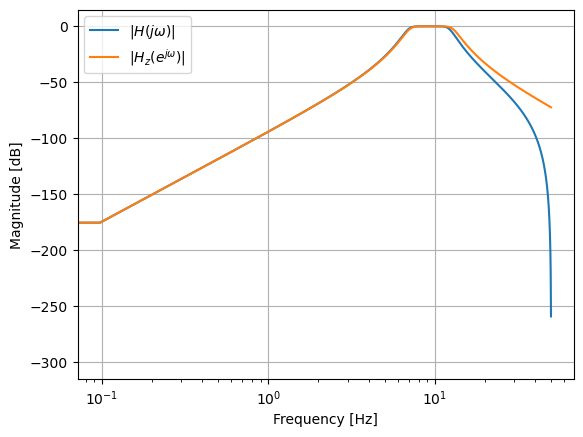

In [7]:
fs = 100
bf = 2 * np.pi * np.array([7, 13])
butter = signal.butter(4, bf, btype='bandpass', analog=True, output='zpk')
#print (butter)
filts = signal.lti (*butter)
#print ("filts1:", filts)
filtz = signal.lti(*signal.bilinear_zpk(filts.zeros, filts.poles, filts.gain, fs))
wz, hz = signal.freqz_zpk(filtz.zeros, filtz.poles, filtz.gain)
ws, hs = signal.freqs_zpk(filts.zeros, filts.poles, filts.gain, worN=fs*wz)
#filts = signal.lti(*signal.butter(4, bf, btype='bandpass', analog=True))
#print ("filts2:", filts)
#filtz = signal.lti(*signal.bilinear(filts.num, filts.den, fs))
#wz, hz = signal.freqz(filtz.num, filtz.den)
#ws, hs = signal.freqs(filts.num, filts.den, worN=fs*wz)
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)), label=r'$|H(j \omega)|$')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hs).clip(1e-15)), label=r'$|H_z(e^{j \omega})|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()


https://www.advsolned.com/converting-analog-filters-into-their-digital-equivalents-getting-the-best-of-both-worlds/#example


$$\frac{\omega_c ^ 2}{(s^2 + \frac{\omega_c}{Q} s + \omega_c^2}$$

[35530.57584392] [1.00000000e+00 2.66613238e+02 3.55305758e+04]
[0.02728621 0.05457243 0.02728621] [ 1.         -1.48135623  0.59050109]
3.1354567304382504
1567.7283652191252
[] [-133.30661896+133.26635428j -133.30661896-133.26635428j] [-0.26661324+0.26653271j -0.26661324-0.26653271j]
[0.9999925-7.50144635e-06j 0.9999925+7.50144635e-06j]
[-1. -1.] [0.74067811+0.20468761j 0.74067811-0.20468761j]


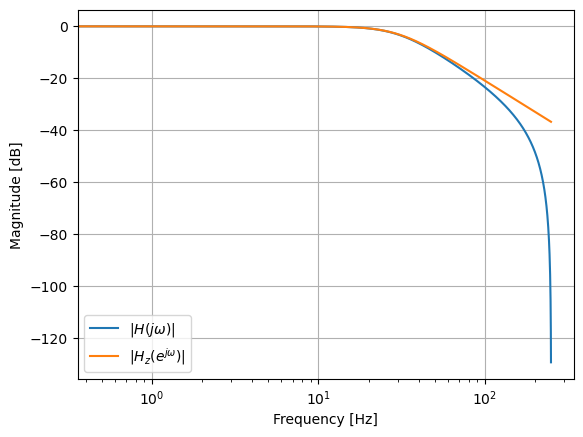

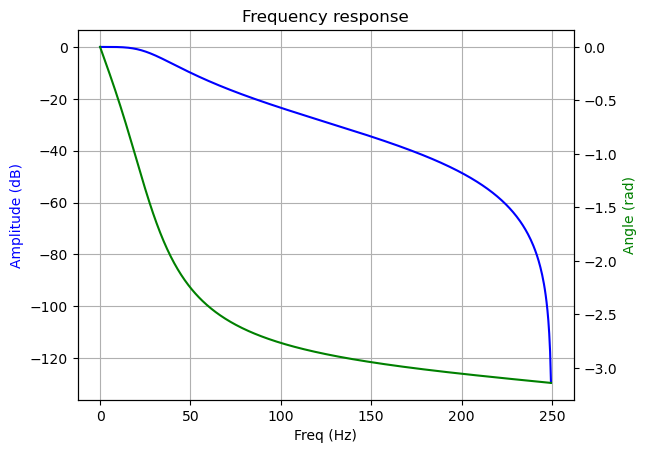

In [8]:
fs = 500
fc = 30
omega_c = 2 * pi * fc
q = 0.707
b = np.array ([omega_c ** 2])
a = np.array ([1, omega_c / q, omega_c ** 2])
filts = signal.lti (b, a)
print (b, a)
filtz = signal.lti(*signal.bilinear(filts.num, filts.den, fs))
print (filtz.num, filtz.den)
wz, hz = signal.freqz(filtz.num, filtz.den)
ws, hs = signal.freqs(filts.num, filts.den, worN=fs*wz)
print (wz [-1])
print (ws [-1])
print (filts.zeros, filts.poles, filts.poles / fs)
print (np.exp (1.0 / (filts.poles * fs)))
print (filtz.zeros, filtz.poles)
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)), label=r'$|H(j \omega)|$')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(hs).clip(1e-15)), label=r'$|H_z(e^{j \omega})|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
plot_response (wz, hz, do_angle = True, fs=fs)

# [Matched Z-Transform example](https://en.wikipedia.org/wiki/Matched_Z-transform_method) from wikipedia

Order-5 Chebychev poles according to the
[picture in the wikipedia article](https://en.wikipedia.org/wiki/File:Chebyshev_s_plane.svg)
Mentions the parameters in [google book](https://books.google.at/books?id=NuRvHVMuzI4C&pg=PA109)
Book mentions an appendix on how to compute zeros
But zeros *are* given in following table.
The table contains reals but since in the first table
imag and real are in separate columns the zeros are probably imag.
Seems these are given in rad and have to be scaled by frequency (20Hz)


analog gain: 3.7876490369221325


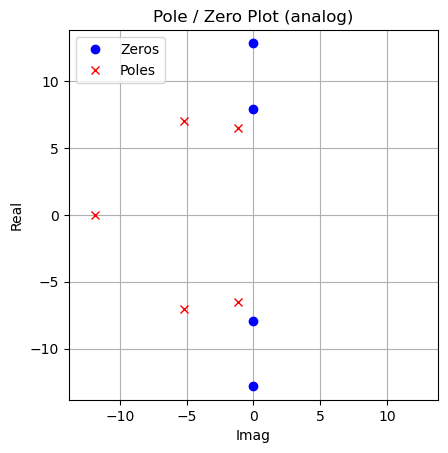

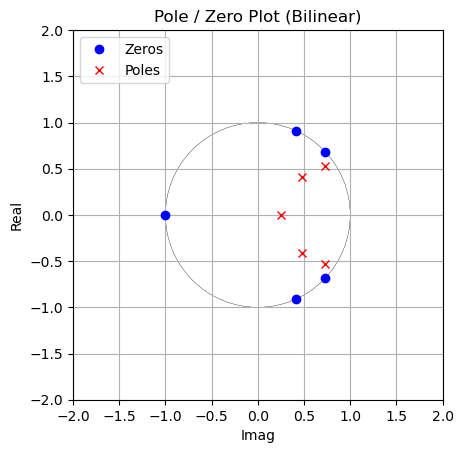

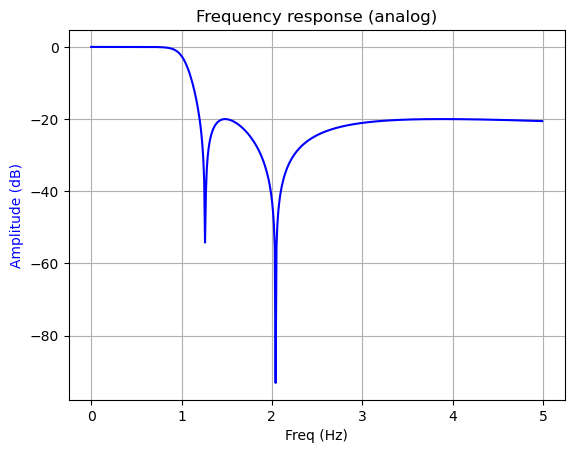

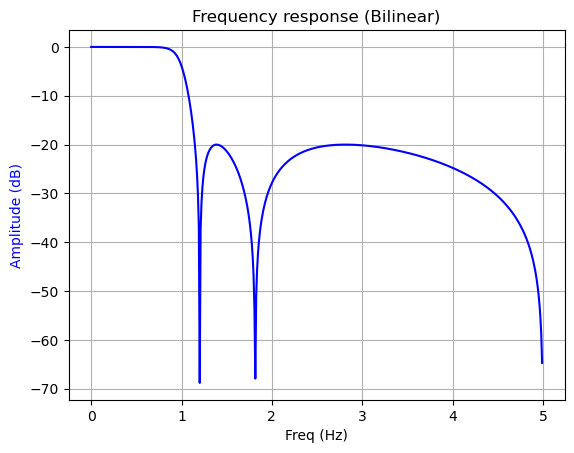

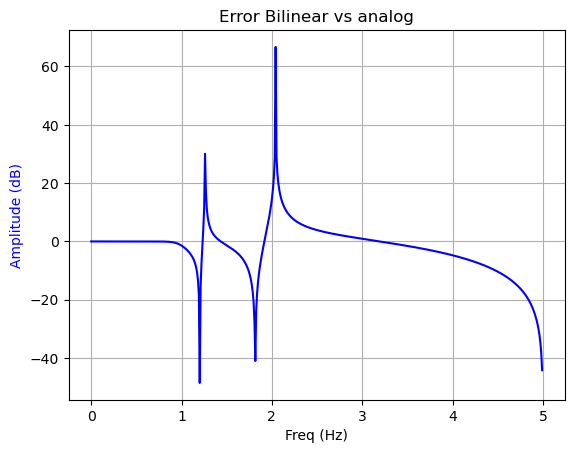

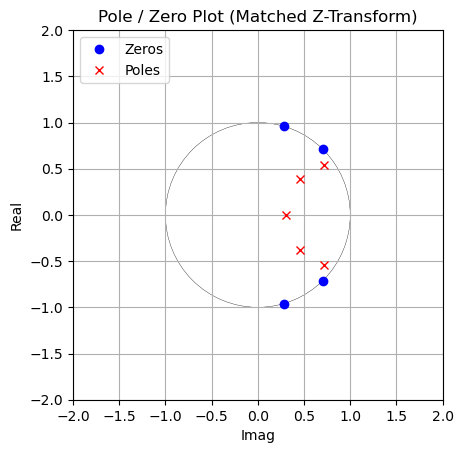

digital gain (matched Z-Transform): 0.1352684673351455


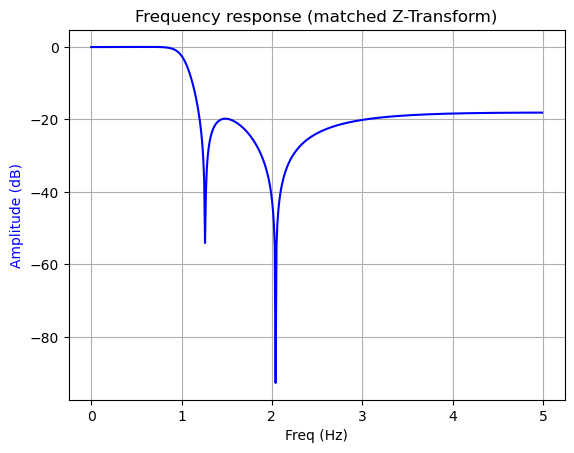

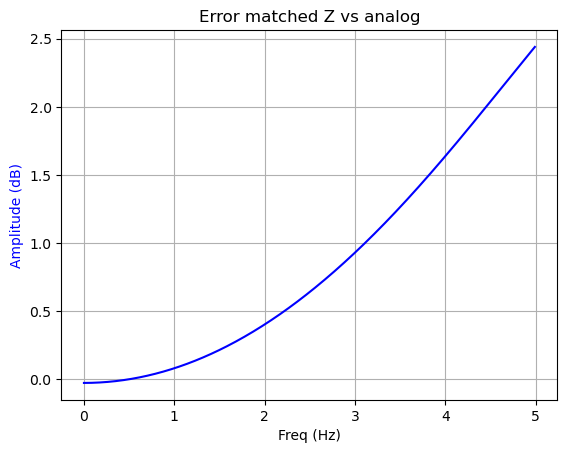

In [9]:
# Order-5 for 3dB Bandwidth and 20dB Stopband attenuation
# This is the one also plotted on wikipedia.
# 3dB Frequency: 0.84462
fs = 10

cpoles = [0.17766+1.01995j, 0.81236+1.10097j, 1.86437]
czeros = [1.24489j, 2.01428j]
update_conjugate_complex (cpoles)
update_conjugate_complex (czeros)
cpoles = np.array (cpoles)
czeros = np.array (czeros)

cpoles = cpoles / np.pi * -2 * fs
czeros = czeros / np.pi *  2 * fs

# Normalize to 1.0 @0.5Hz
k = 1.0
ws, hs = signal.freqs_zpk (czeros, cpoles, k, [0.5])
#print (k, abs (hz [0]), k / abs (hz [0]))
k = k / abs (hs [0])
print ("analog gain:", k)
filts = signal.lti (czeros, cpoles, k)
pole_zero_plot (filts.poles, filts.zeros, title='(analog)', show_uc = False)
#print (filts.zeros, filts.poles, filts.gain)
filtz = signal.lti (*signal.bilinear_zpk(filts.zeros, filts.poles, filts.gain, fs))
wz, hz = signal.freqz_zpk (filtz.zeros, filtz.poles, filtz.gain)
#print (filtz.zeros, filtz.poles, filtz.gain)
pole_zero_plot (filtz.poles, filtz.zeros, title='(Bilinear)')
# worN is an *angular frequency* (e.g. in rad/s but here in rad * fs)
ws, hs = signal.freqs_zpk (filts.zeros, filts.poles, filts.gain, worN=fs*wz)
#ws, hs = signal.freqs_zpk (filts.zeros, filts.poles, filts.gain)
plot_response (wz, hs, fs=10, title='(analog)')
plot_response (wz, hz, fs=10, title='(Bilinear)')
plot_response (wz, abs (hz) / abs (hs), fs=10, title='-Error Bilinear vs analog')

zzeros = np.exp (czeros / fs)
zpoles = np.exp (cpoles / fs)
pole_zero_plot (zpoles, zzeros, title = '(Matched Z-Transform)')
k = 1.0
# Normalize to 1.0 @0.5 (pi / 5)
wz, hz = signal.freqz_zpk (zzeros, zpoles, k, [0.5 * np.pi / 5])
k = k / abs (hz [0])
print ("digital gain (matched Z-Transform):", k)
filtz1 = signal.lti (zzeros, zpoles, k)
wz, hz = signal.freqz_zpk (filtz1.zeros, filtz1.poles, filtz1.gain)
plot_response (wz, hz, fs=10, title='(matched Z-Transform)')
#plot_response (wz, 20 * np.log10 (abs (hz)) - 20 * np.log10 (abs (hs)), fs=10, title='-Error matched Z vs analog', logy=0)
plot_response (wz, abs (hz) / abs (hs), fs=10, title='-Error matched Z vs analog')

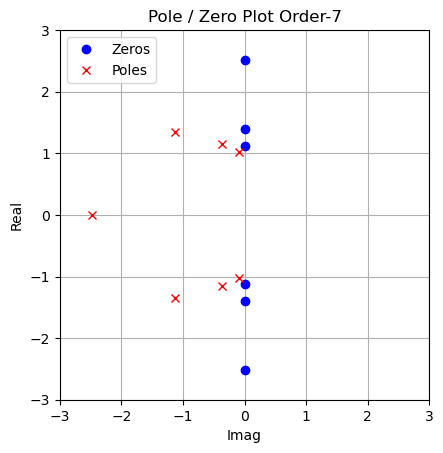

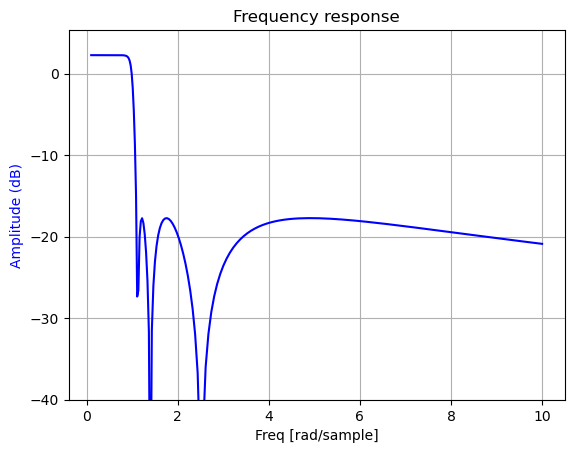

In [10]:
# Order-5 for 3dB Bandwidth and 30dB Stopband attenuation
# 3dB Frequency: 0.73314
cpoles = [0.22153+100244j, 0.84874+0.90666j, 1.47021]
czeros = [1.43419j, 2.32056j]
# Order-5 for 3dB Bandwidth and 40dB Stopband attenuation
# Hmpf: The page with the zero-Table isn't shown in google preview
cpoles = [0.25195+0.98715j, 0.84806+0.78437j, 1.27301]
czeros = []

# Order-7
# 3dB Frequency: 0.91533
cpoles = [0.09360+1.01680j, 0.37271+1.15880j, 1.13417+1.35424j, 2.47872]
czeros = [1.12060j, 1.39737j, 2.51797j]
update_conjugate_complex (cpoles)
update_conjugate_complex (czeros)
cpoles = np.array (cpoles) * -1
czeros = np.array (czeros)
pole_zero_plot (cpoles, czeros, title='Order-7', limit=3, show_uc = False)
filts  = signal.lti (czeros, cpoles, 1.0)
ws, hs = signal.freqs_zpk(filts.zeros, filts.poles, filts.gain)
plot_response (ws, hs, ymin = -40)

From:
Timo I. Laakso, Jari Ranta, and Seppo J. Ovaska. Design and
implementation of efficient IIR notch filters with quantization
error feedback. IEEE Transactions on Instrumentation and Measurement,
43(3):449–456, June 1994.

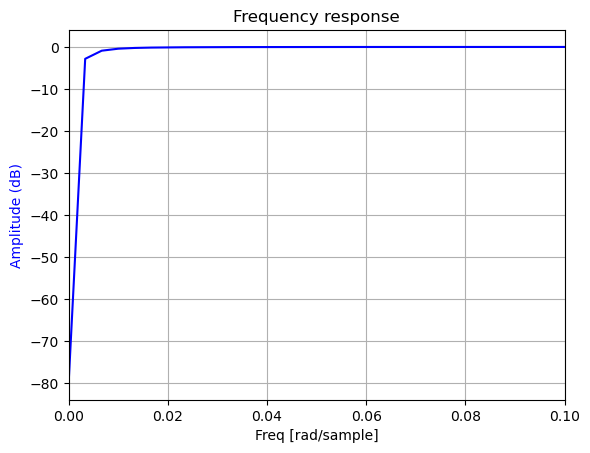

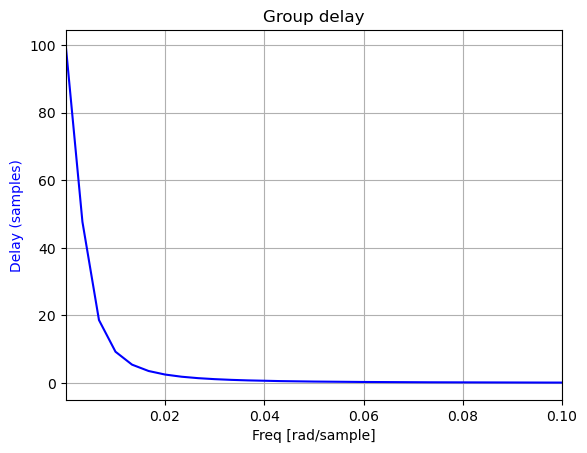

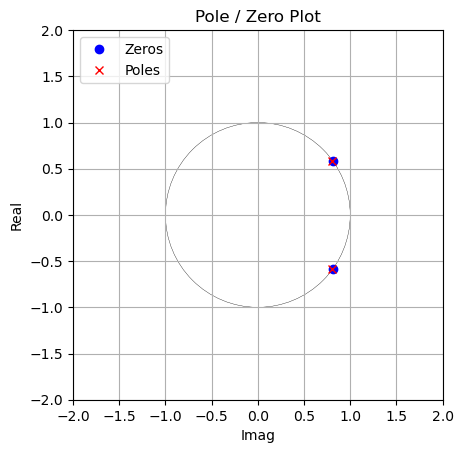

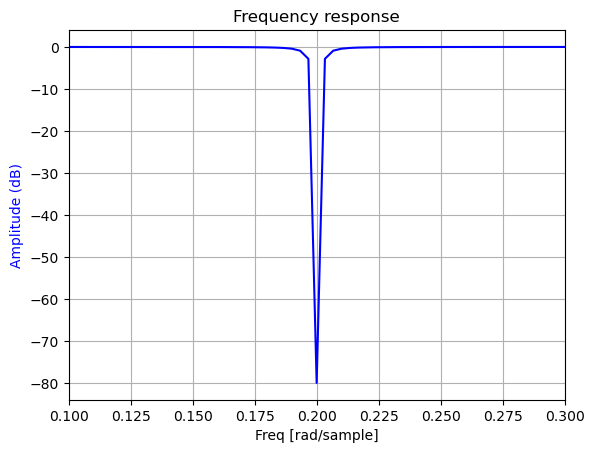

[ 1.         -1.61803399  1.        ] [ 1.         -1.60185365  0.9801    ]


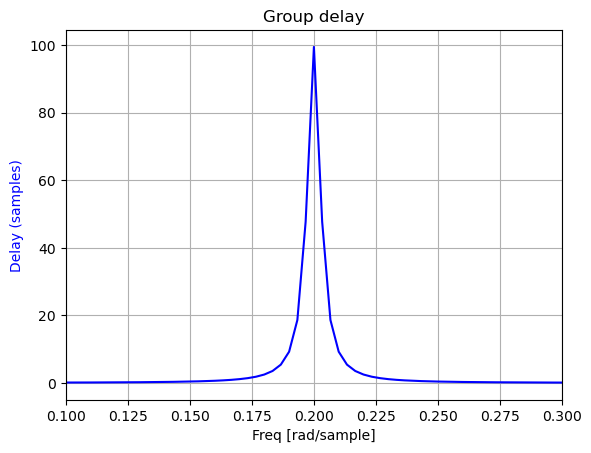

In [12]:
# First order
z = [1]
p = [0.99]
k = 1.0
x = np.array (range (300)) / 300. * pi + 1e-6
w_1, h_1 = signal.freqz_zpk (z, p, k, x)
w_1 = w_1 / np.pi
plot_response (w_1, h_1, xmin=0.0, xmax=.1)
a, b = signal.zpk2tf (z, p, k)
wgd, gd = signal.group_delay ((a, b), x)
plot_delay (w_1, gd, xmin=1e-6, xmax=.1)
# Second order, two conjugate-complex zeros and nulls
r = 0.99
z = np.array ([np.e ** (0.2j * np.pi), np.e ** (-0.2j * np.pi)])
p = z * r
pole_zero_plot (p, z)
w_2, h_2 = signal.freqz_zpk (z, p, k, x)
w_2 = w_2 / np.pi
plot_response (w_2, h_2, xmin=0.1, xmax=0.3)
a, b = signal.zpk2tf (z, p, k)
print (a, b)
wgd, gd = signal.group_delay ((a, b), x)
plot_delay (w_2, gd, xmin=0.1, xmax=0.3)

From Vondras Martinek 2001

1.0
0.011592162608697632


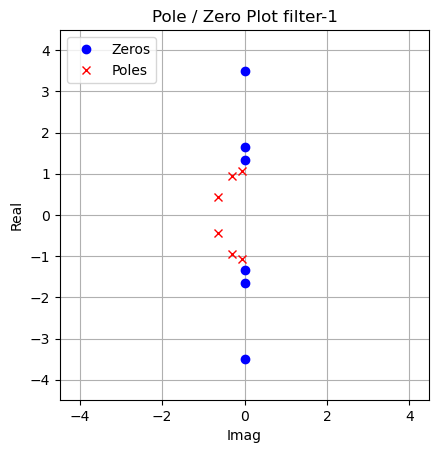

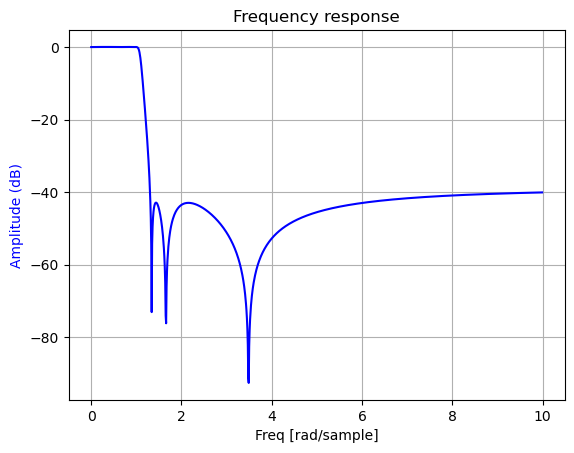

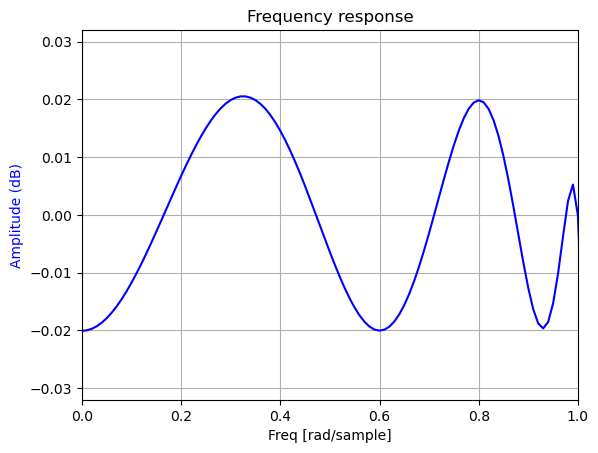

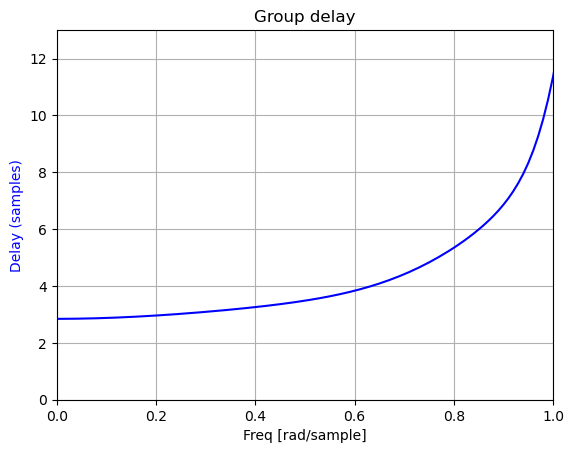

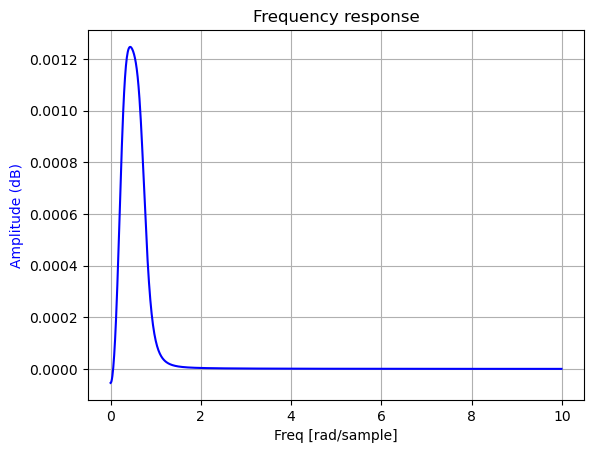

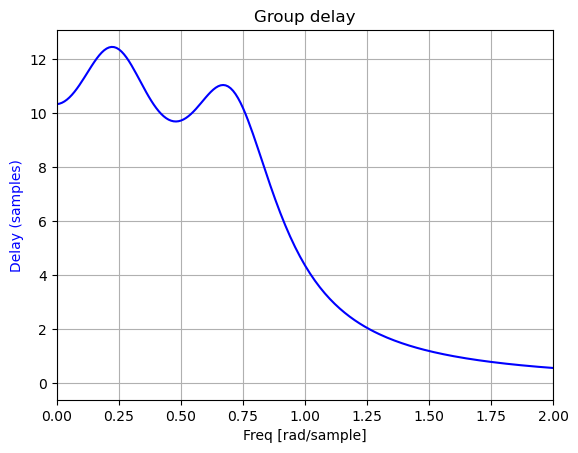

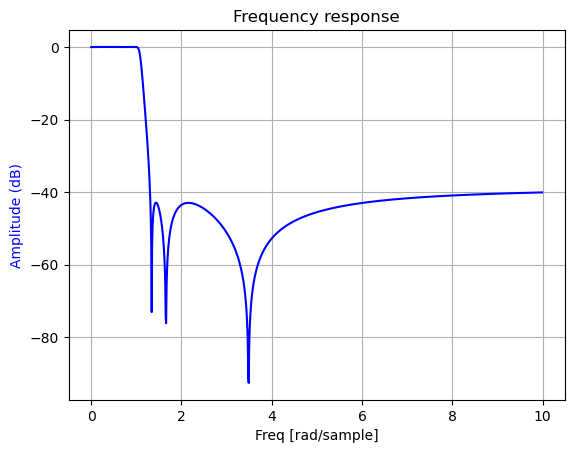

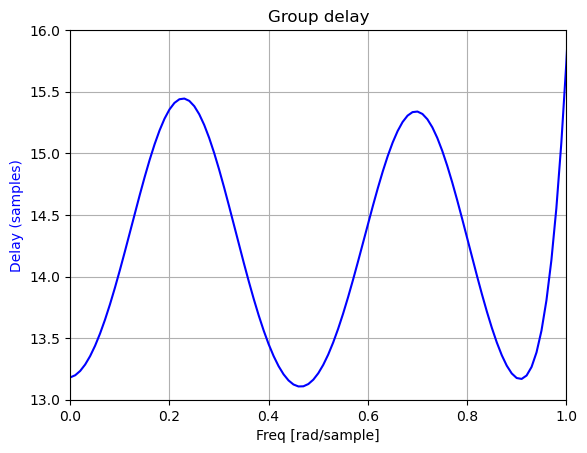

In [13]:
p1 =\
    [ -0.07466230719+1.07745299805537j
    , -0.29620972165+0.94125996699421j
    , -0.643415464943+0.4433632812871j
    ]
z1 =\
    [ 1.33884893018477j
    , 1.65557124811804j
    , 3.48539592843003j
    ]
update_conjugate_complex (p1)
update_conjugate_complex (z1)
p2 =\
    [ -0.235147067822+0.7015078742j
    , -0.235215443140+0.2321199994j
    ]
z2 =\
    [ 0.235157952581+0.70152561495j
    , 0.235231164280+0.23208970199j
    ]
update_conjugate_complex (p2)
update_conjugate_complex (z2)
filts1 = signal.lti (z1, p1, 1.0)
filts2 = signal.lti (z2, p2, 1.0)

w1, h1 = signal.freqs_zpk(filts1.zeros, filts1.poles, filts1.gain, [0.165])
print (filts1.gain)
g = filts1.gain / abs (h1 [0])
filts1.gain = g
print (filts1.gain)

pole_zero_plot (filts1.poles, filts1.zeros, title='filter-1', show_uc = False)
w1     = np.arange (1000.) / 100.
#print (w1)
w1, h1 = signal.freqs_zpk(filts1.zeros, filts1.poles, filts1.gain, w1)
#print (w1)
g1     = -np.diff (np.unwrap (np.angle (h1))) / np.diff (w1)
gw1    = gw2 = w1 [:-1]
#print (len (gd), len (gw), len (ws))
plot_response (w1, h1)
plot_response (w1, h1, xmin=0, xmax=1, ymin=-0.032, ymax=0.032)
plot_delay (gw1, g1, xmax = 1, ymax=13, ymin=0)
w2, h2 = signal.freqs_zpk(filts2.zeros, filts2.poles, filts2.gain, w1)
g2     = -np.diff (np.unwrap (np.angle (h2))) / np.diff (w2)
plot_response (w2, h2)
plot_delay (gw2, g2, xmax = 2)
hg = h1 * h2
plot_response (w2, hg)
gg     = -np.diff (np.unwrap (np.angle (hg))) / np.diff (w2)
plot_delay (gw2, gg, xmax = 1, ymax=16, ymin=13)